3.请用 College 数据集（见附录文件）中的变量来预测申请人数（变量 Accept）。关于这一数据集的详细信息可见 https://intro-stat-learning.github.io/ISLP/datasets/College.html 。

提示: 可使用任意你熟悉的程序设计语言或统计软件实现（Python, R, MATLAB,
SPSS, Stata, …）。在结果中给出输出结果的具体实现过程（如使用数据可视化描
述交叉验证选择模型参数）。建议附上源代码（有加分）。如果使用 Python 实现，
可参考 https://intro-stat-learning.github.io/ISLP/labs.html 上的相关资
料, 也可使用你熟悉的包如 scikit-learn 等。

# U.S. News and World Report’s College Data
《美国新闻与世界报道》的大学数据

## 数据说明
这是1995年《美国新闻与世界报道》中大量美国大学的统计数据。

- **Private**：表示私立大学或公立大学的“否”和“是”的系数
- **Apps**：收到的申请数量
- **Accept**：接受的申请数量
- **Enroll**：新生入学人数
- **Top10perc**：H.S.班级前10%的新生比例
- **Top25perc**：H.S.班级前25%的新生比例
- **F.Undergrad**：全日制本科生人数
- **P.Undergrad**：非全日制本科生人数
- **Outstate**：州外学费
- **Room.Board**：食宿费用
- **Books**：估计的书籍费用
- **Personal**：预估个人支出
- **PhD**：拥有博士学位的教师比例
- **Terminal**：拥有最终学位的教师比例
- **S.F.Ratio**：师生比例
- **perc.alumni**：捐赠的校友比例
- **Expend**：每个学生的教学支出
- **Grad.Rate**：毕业率



(a) 将数据集分割为训练集和测试集。在训练集上拟合最小二乘模型，并给出该模型的测试误差。

In [5]:
!pip install ISLP
from ISLP import load_data
College = load_data('College')
College.columns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 40.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (2

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [12]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('College.csv')
# 将 'Private' 列的 'Yes' 和 'No' 转换为 1 和 0
data['Private'] = data['Private'].replace({'Yes': 1, 'No': 0})
# 检查转换结果
print(data)

     Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0          1   1660    1232     721         23         52         2885   
1          1   2186    1924     512         16         29         2683   
2          1   1428    1097     336         22         50         1036   
3          1    417     349     137         60         89          510   
4          1    193     146      55         16         44          249   
..       ...    ...     ...     ...        ...        ...          ...   
772        0   2197    1515     543          4         26         3089   
773        1   1959    1805     695         24         47         2849   
774        1   2097    1915     695         34         61         2793   
775        1  10705    2453    1317         95         99         5217   
776        1   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0            537      7440        330

In [24]:
from sklearn.model_selection import train_test_split

# 定义特征和目标变量
X = data.drop(['Accept'], axis=1)
y = data['Accept']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 将训练集和测试集保存为CSV文件
X_train.to_csv('train_features.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 创建线性回归模型实例
model = LinearRegression()
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_labels.csv')
# 在训练集上训练模型
model.fit(X_train, y_train)

X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_labels.csv')
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算预测的均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
print("测试集上的均方误差（MSE）:", mse)

测试集上的均方误差（MSE）: 285303.5632224015


(b) 在训练集上使用岭回归模型，选择使用交叉验证选择参数λ（对$\sum_{j=1}^p\beta_j^2$的调整参数）。给出选择的最佳参数。（提示：可使用“一标准误差规则（one-standard-error rule）”）

最佳正则化参数λ: 840.6652885618316


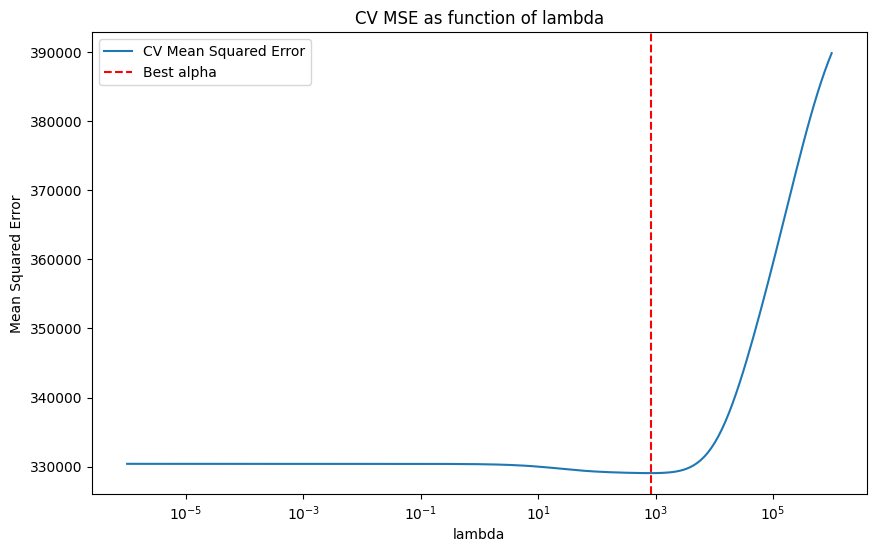

测试集上的均方误差（MSE）: 290285.5989249952


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# 读取数据
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_labels.csv')
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_labels.csv')

# 定义要测试的λ值
alphas = 10**np.linspace(-6, 6, 200)

# 创建岭回归模型实例，使用交叉验证
model = RidgeCV(alphas=alphas, store_cv_values=True)
model.fit(X_train, y_train.values.ravel())  # 确保 y_train 为正确的形状

# 找到最佳的λ值
best_alpha = model.alpha_
print("最佳正则化参数λ:", best_alpha)

# 计算交叉验证的均方误差
cv_mse = np.mean(model.cv_values_, axis=0)

# 画出均方误差和λ的关系图
plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_mse, label='CV Mean Squared Error')
plt.axvline(x=best_alpha, color='r', linestyle='--', label='Best alpha')
plt.xlabel('lambda')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.title('CV MSE as function of lambda')
plt.legend()
plt.show()

# 使用最佳的λ重新训练模型
model_best = RidgeCV(alphas=[best_alpha])
model_best.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model_best.predict(X_test)

# 计算测试集上的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集上的均方误差（MSE）:", mse)

在训练集上拟合 LASSO 模型，请使用交叉验证选择参数 λ（对$\sum_{j=1}^p|\beta_j|$的
调整参数）的值。给出该模型的测试误差和非零系数估计值的个数。

最佳正则化参数 λ: 11093.142441144446
测试集上的均方误差（MSE）: 330638.0190459359
非零系数的数量: 8


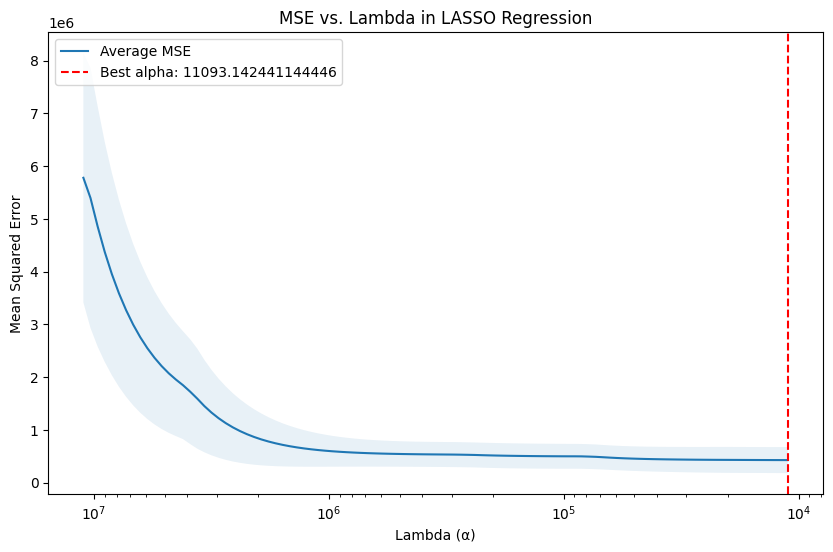

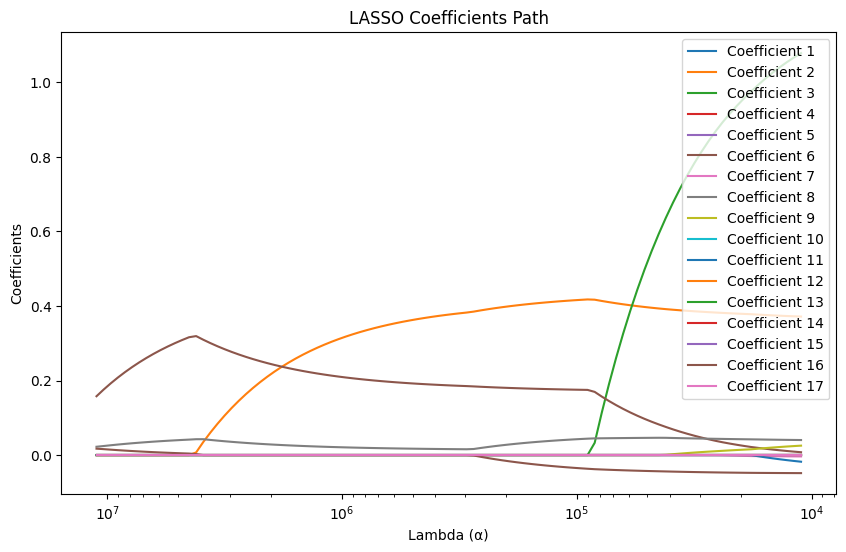

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# 读取数据
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_labels.csv').values.ravel()  # 确保使用 ravel()
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_labels.csv')

# 创建 LASSO 模型实例，并使用交叉验证找到最佳 lambda
lasso = LassoCV(cv=10, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)

# 最佳的 λ 值
best_alpha = lasso.alpha_
print("最佳正则化参数 λ:", best_alpha)

# 在测试集上进行预测
y_pred = lasso.predict(X_test)

# 计算测试集上的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集上的均方误差（MSE）:", mse)

# 计算非零系数的数量
non_zero_weights = np.sum(lasso.coef_ != 0)
print("非零系数的数量:", non_zero_weights)

# 绘制 MSE 和 λ 的关系
mse_path = np.mean(lasso.mse_path_, axis=1)
alphas = lasso.alphas_

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path, label='Average MSE')
plt.fill_between(alphas, mse_path - np.std(lasso.mse_path_, axis=1), mse_path + np.std(lasso.mse_path_, axis=1), alpha=0.1)
plt.axvline(best_alpha, linestyle='--', color='red', label=f'Best alpha: {best_alpha}')
plt.xscale('log')
plt.xlabel('Lambda (α)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Lambda in LASSO Regression')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

# 绘制系数路径
plt.figure(figsize=(10, 6))
for i in range(lasso.coef_.shape[0]):
    plt.plot(alphas, lasso.path(X_train, y_train, alphas=alphas)[1][i, :], label=f'Coefficient {i+1}')
plt.xscale('log')
plt.xlabel('Lambda (α)')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients Path')
plt.legend(loc='upper right')
plt.gca().invert_xaxis()
plt.show()


在训练集上拟合主成分回归（PCR）模型, 请使用交叉验证选择参数 M （主成分数量）的值。给出该模型的测试误差和交叉验证选择的 M 的取值。

最佳主成分数量 M: 17
测试集上的均方误差（MSE）: 285303.563222402


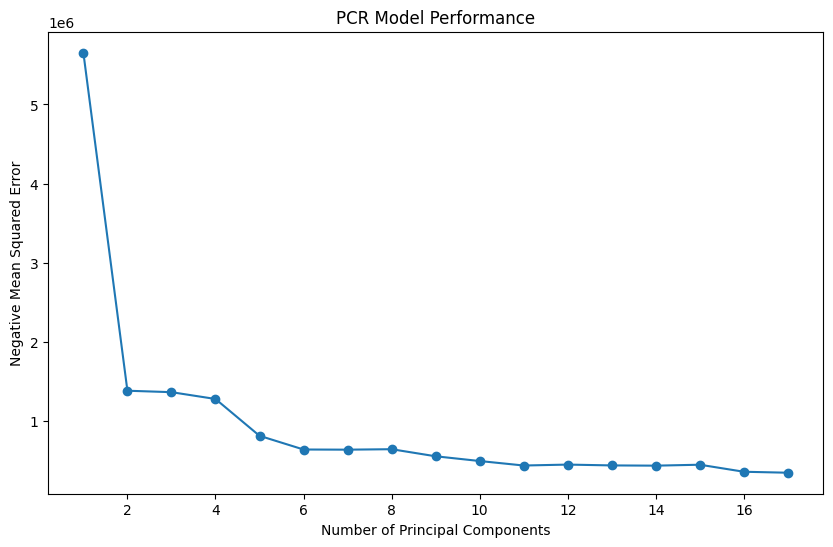

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 读取数据
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_labels.csv')
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_labels.csv')

# 标准化特征（重要，因为PCA对数据的缩放敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 用于存储交叉验证结果
cv_scores = []
components_range = range(1, min(len(X_train.columns), len(X_train)) + 1)

# 对不同数量的主成分进行测试
for n_components in components_range:
    # 创建PCA和线性回归的pipeline
    pca = PCA(n_components=n_components)
    lr = LinearRegression()
    model = Pipeline(steps=[('pca', pca), ('linear_regression', lr)])

    # 交叉验证
    scores = cross_val_score(model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# 找到最佳主成分数量
best_n_components = components_range[np.argmax(cv_scores)]
print("最佳主成分数量 M:", best_n_components)

# 使用最佳主成分数量重新训练模型
pca = PCA(n_components=best_n_components)
lr = LinearRegression()
model = Pipeline(steps=[('pca', pca), ('linear_regression', lr)])
model.fit(X_train_scaled, y_train.values.ravel())

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 计算测试集上的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集上的均方误差（MSE）:", mse)

# 可视化主成分数量与交叉验证分数的关系
plt.figure(figsize=(10, 6))
plt.plot(components_range, np.abs(cv_scores), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Negative Mean Squared Error')
plt.title('PCR Model Performance')
plt.show()

在训练集上拟合偏最小二乘回归（PLS）模型, 请使用交叉验证选择参数 M（主成分数量）的值。给出该模型的测试误差和交叉验证选择的 M 的取值。

最佳主成分数量 M: 15
测试集上的均方误差（MSE）: 285560.9749542127


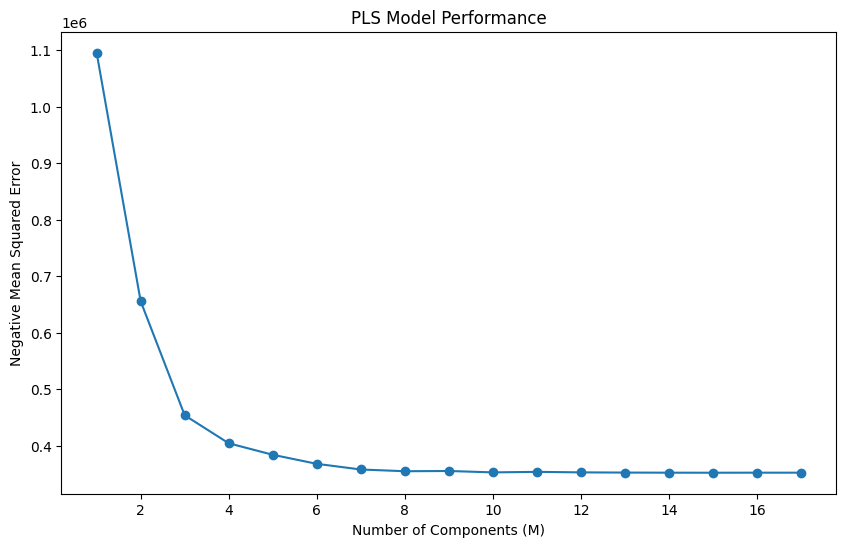

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 读取数据
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_labels.csv')
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_labels.csv')

# 标准化数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 选择的最大主成分数不能超过特征数和样本数的最小值
max_components = min(X_train_scaled.shape[1], X_train_scaled.shape[0]-1)

# 准备用于存储交叉验证分数的列表
cv_scores = []
components_range = range(1, max_components + 1)

# 使用不同数量的主成分进行交叉验证
for n_components in components_range:
    pls = PLSRegression(n_components=n_components)
    scores = cross_val_score(pls, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

# 找到最佳主成分数量
best_n_components = components_range[np.argmax(cv_scores)]
print("最佳主成分数量 M:", best_n_components)

# 使用最佳主成分数量重新训练模型
pls_best = PLSRegression(n_components=best_n_components)
pls_best.fit(X_train_scaled, y_train.values.ravel())

# 在测试集上进行预测
y_pred = pls_best.predict(X_test_scaled)

# 计算测试集上的均方误差
mse = mean_squared_error(y_test, y_pred)
print("测试集上的均方误差（MSE）:", mse)

# 可视化主成分数量与交叉验证分数的关系
plt.figure(figsize=(10, 6))
plt.plot(components_range, np.abs(cv_scores), marker='o')
plt.xlabel('Number of Components (M)')
plt.ylabel('Negative Mean Squared Error')
plt.title('PLS Model Performance')
plt.show()